In [3]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
benchmark = '*'

In [5]:
csv_files = glob.glob(f"data/*{benchmark}*.csv")
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

In [6]:
df_pivot = df.pivot(index='file_path', columns='dag_mode', values='closure')

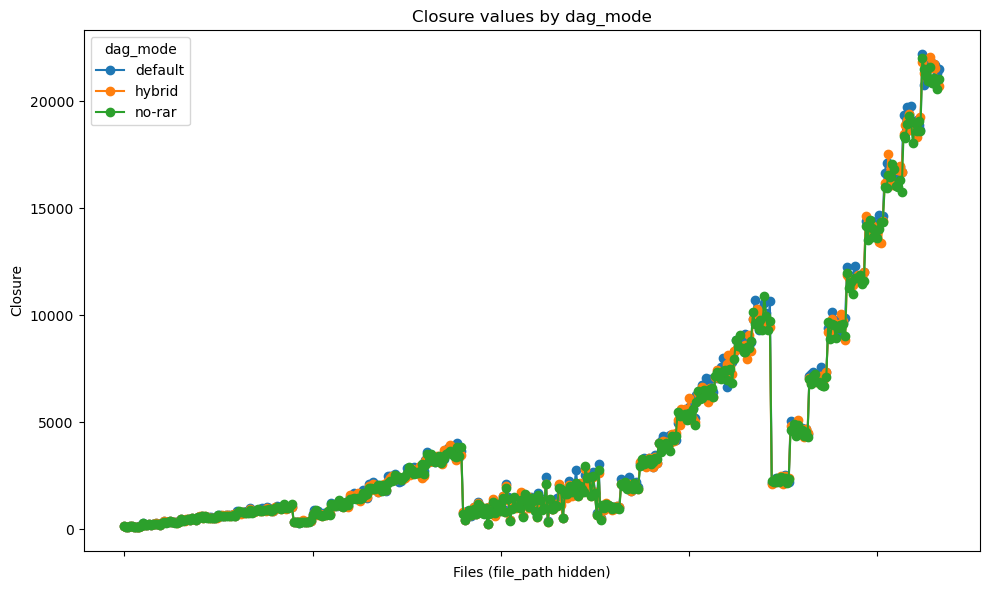

In [7]:
ax = df_pivot.plot(kind='line', marker='o', figsize=(10, 6))
ax.set_xticklabels([])  # Hide file_path labels
ax.set_xlabel("Files (file_path hidden)")
ax.set_ylabel("Closure")
ax.set_title("Closure values by dag_mode")
ax.legend(title="dag_mode")
plt.tight_layout()
plt.show()

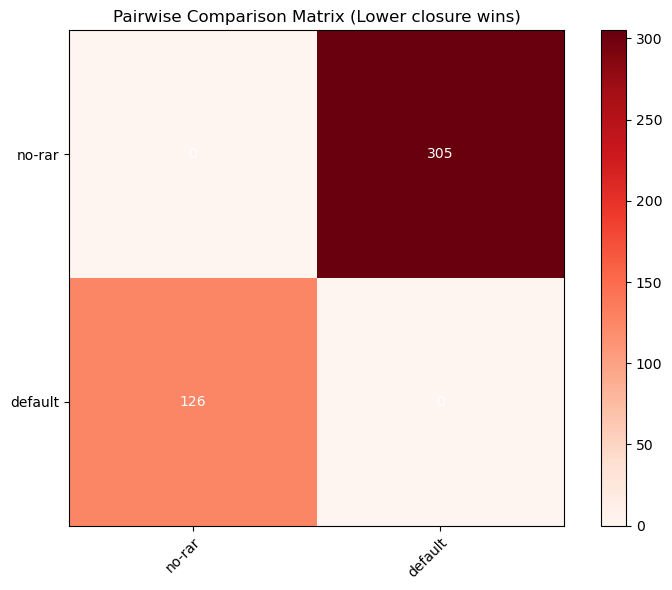

In [8]:
dag_modes = ['no-rar','default']
comparison_matrix = pd.DataFrame(0, index=dag_modes, columns=dag_modes)

for idx, row in df_pivot.iterrows():
    for mode_i in dag_modes:
        for mode_j in dag_modes:
            if mode_i != mode_j:
                if row[mode_i] < row[mode_j]:
                    comparison_matrix.loc[mode_i, mode_j] += 1

# 5. Draw the confusion matrix (heatmap) using matplotlib:
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(comparison_matrix, cmap='Reds')

# Set ticks and labels for the axes
ax.set_xticks(np.arange(len(comparison_matrix.columns)))
ax.set_yticks(np.arange(len(comparison_matrix.index)))
ax.set_xticklabels(comparison_matrix.columns)
ax.set_yticklabels(comparison_matrix.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Add text annotations inside each cell for clarity
for i in range(len(comparison_matrix.index)):
    for j in range(len(comparison_matrix.columns)):
        ax.text(j, i, comparison_matrix.iloc[i, j],
                ha="center", va="center", color="white")

ax.set_title("Pairwise Comparison Matrix (Lower closure wins)")
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

In [9]:
default_avg = df_pivot['default'].mean()
rar_avg = df_pivot['no-rar'].mean()
# Percentage improvement: positive if rar has lower closure (better) than default
improvement_percentage = ((default_avg - rar_avg) / default_avg) * 100


print(f"Average closure (default): {default_avg:.2f} swaps")
print(f"Average closure (rar): {rar_avg:.2f} swaps")
print(
    f"Percentage improvement of dag mode rar over default: {improvement_percentage:.2f}%")

Average closure (default): 4346.83 swaps
Average closure (rar): 4242.29 swaps
Percentage improvement of dag mode rar over default: 2.40%
